In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
##Modeling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


In [2]:
df=pd.read_csv('stud.csv')

In [3]:
X=df.drop(columns=['math_score'],axis=1)
y=df['math_score']

In [4]:
num_feature=X.select_dtypes(exclude="object").columns
cat_feature=X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
    ("onehotEncoder",oh_transformer,cat_feature),
    ("standardscaler",numeric_transformer,num_feature),
    ]
)


In [5]:
X=preprocessor.fit_transform(X)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [7]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2=r2_score(true,predicted)
    return mae, rmse ,r2

In [8]:
models={
    "Lnear Regression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors regressor":KNeighborsRegressor(),
    "Decision Tree Regressor":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor()

}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    #make predicition
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Evaluate train and test dataset
    train_mae,train_rmse,train_r2=evaluate_model(y_train,y_train_pred)
    test_mae,test_rmse,test_r2=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("-Root Mean Squarred Error: {:.4f}",format(train_rmse))
    print("- Mean Absolute Error:{:.4f}".format(train_mae))
    print("-R2 score:{:.4f}".format(train_r2))

    print("---------------------------------")


    print('Model performance for Test set')
    print("-Root Mean Squarred Error: {:.4f}",format(test_rmse))
    print("- Mean Absolute Error:{:.4f}".format(test_mae))
    print("-R2 score:{:.4f}".format(test_r2))
    r2_list.append(test_r2)

    print("="*35)
    print("\n")


Lnear Regression
Model performance for Training set
-Root Mean Squarred Error: {:.4f} 5.329287354885032
- Mean Absolute Error:4.2715
-R2 score:0.8740
---------------------------------
Model performance for Test set
-Root Mean Squarred Error: {:.4f} 5.425185408698029
- Mean Absolute Error:4.2222
-R2 score:0.8790


Lasso
Model performance for Training set
-Root Mean Squarred Error: {:.4f} 6.593815587795565
- Mean Absolute Error:5.2063
-R2 score:0.8071
---------------------------------
Model performance for Test set
-Root Mean Squarred Error: {:.4f} 6.519694535667419
- Mean Absolute Error:5.1579
-R2 score:0.8253


Ridge
Model performance for Training set
-Root Mean Squarred Error: {:.4f} 5.323324922741654
- Mean Absolute Error:4.2650
-R2 score:0.8743
---------------------------------
Model performance for Test set
-Root Mean Squarred Error: {:.4f} 5.390387016935637
- Mean Absolute Error:4.2111
-R2 score:0.8806




c:\ml\venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ml\venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\ml\venv\lib\subprocess.py", line 493, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\ml\venv\lib\subprocess.py", line 858, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\ml\venv\lib\subprocess.py", line 1327, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


K-Neighbors regressor
Model performance for Training set
-Root Mean Squarred Error: {:.4f} 5.707884897227694
- Mean Absolute Error:4.5168
-R2 score:0.8555
---------------------------------
Model performance for Test set
-Root Mean Squarred Error: {:.4f} 7.253040741647602
- Mean Absolute Error:5.6210
-R2 score:0.7838


Decision Tree Regressor
Model performance for Training set
-Root Mean Squarred Error: {:.4f} 0.2795084971874737
- Mean Absolute Error:0.0187
-R2 score:0.9997
---------------------------------
Model performance for Test set
-Root Mean Squarred Error: {:.4f} 7.928114529949728
- Mean Absolute Error:6.2750
-R2 score:0.7417


Random Forest Regressor
Model performance for Training set
-Root Mean Squarred Error: {:.4f} 2.298480352818285
- Mean Absolute Error:1.8433
-R2 score:0.9766
---------------------------------
Model performance for Test set
-Root Mean Squarred Error: {:.4f} 6.098378158143542
- Mean Absolute Error:4.7394
-R2 score:0.8472


XGBRegressor
Model performance for 

In [9]:
pd.DataFrame(list(zip(model_list,r2_list)), columns=['Model Name','R2_score']).sort_values(by=["R2_score"],ascending=False)

,Model Name,R2_score
2,Ridge,0.880593
0,Lnear Regression,0.879046
7,CatBoostRegressor,0.851632
5,Random Forest Regressor,0.847167
8,AdaBoostRegressor,0.845437
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors regressor,0.783813
4,Decision Tree Regressor,0.741697


In [10]:
lin_model= LinearRegression(fit_intercept=True)
lin_model= lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)


Accuracy of the model is 87.90


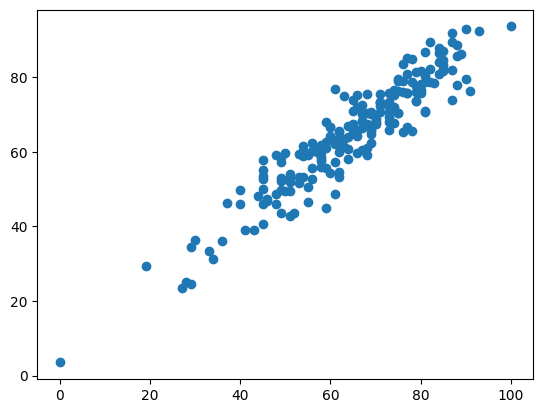

In [11]:
plt.scatter(y_test,y_pred)

<Axes: xlabel='math_score'>

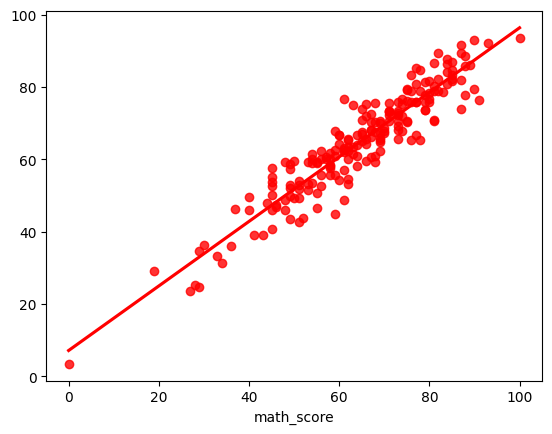

In [12]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [13]:
pred_df=pd.DataFrame({'Actual value':y_test,'predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual value,predicted Value,Difference
521,91,76.4375,14.5625
737,53,59.3125,-6.3125
740,80,76.6250,3.3750
660,74,76.5625,-2.5625
411,84,87.7500,-3.7500
...,...,...,...
408,52,43.6875,8.3125
332,62,62.3125,-0.3125
208,74,67.7500,6.2500
613,65,67.0000,-2.0000
